#  predicting credit card approval



In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
from matplotlib.pyplot import figure
import plotly.express as px

In [2]:
data1=pd.read_csv('/content/Credit_card.csv')


In [3]:
data2=pd.read_csv('/content/Credit_card_label.csv')

#   As we were having two different csv file so we are merging them.

In [4]:
df = pd.merge(data1, data2, how='inner', on=['Ind_ID'])     
df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


In [5]:
df.shape

(1548, 19)

In [6]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [7]:
df.tail()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2,0


In [8]:
df.dtypes

Ind_ID               int64
GENDER              object
Car_Owner           object
Propert_Owner       object
CHILDREN             int64
Annual_income      float64
Type_Income         object
EDUCATION           object
Marital_status      object
Housing_type        object
Birthday_count     float64
Employed_days        int64
Mobile_phone         int64
Work_Phone           int64
Phone                int64
EMAIL_ID             int64
Type_Occupation     object
Family_Members       int64
label                int64
dtype: object

In [9]:
print(df.describe())

             Ind_ID     CHILDREN  Annual_income  Birthday_count  \
count  1.548000e+03  1548.000000   1.525000e+03     1526.000000   
mean   5.078920e+06     0.412791   1.913993e+05   -16040.342071   
std    4.171759e+04     0.776691   1.132530e+05     4229.503202   
min    5.008827e+06     0.000000   3.375000e+04   -24946.000000   
25%    5.045070e+06     0.000000   1.215000e+05   -19553.000000   
50%    5.078842e+06     0.000000   1.665000e+05   -15661.500000   
75%    5.115673e+06     1.000000   2.250000e+05   -12417.000000   
max    5.150412e+06    14.000000   1.575000e+06    -7705.000000   

       Employed_days  Mobile_phone   Work_Phone        Phone     EMAIL_ID  \
count    1548.000000        1548.0  1548.000000  1548.000000  1548.000000   
mean    59364.689922           1.0     0.208010     0.309432     0.092377   
std    137808.062701           0.0     0.406015     0.462409     0.289651   
min    -14887.000000           1.0     0.000000     0.000000     0.000000   
25%     -31

##   Checking if null values are present or not

In [10]:
df.isnull().sum() 

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

As we can see there are some missing values present in the dataset

# Finding the precentage of missing value so we can deal accordingly

In [11]:
df.isnull().mean()

Ind_ID             0.000000
GENDER             0.004522
Car_Owner          0.000000
Propert_Owner      0.000000
CHILDREN           0.000000
Annual_income      0.014858
Type_Income        0.000000
EDUCATION          0.000000
Marital_status     0.000000
Housing_type       0.000000
Birthday_count     0.014212
Employed_days      0.000000
Mobile_phone       0.000000
Work_Phone         0.000000
Phone              0.000000
EMAIL_ID           0.000000
Type_Occupation    0.315245
Family_Members     0.000000
label              0.000000
dtype: float64

'GENDER', 'Annual_income,'Birthday_count' is having very low no of missing values either we can remove it or deal with it accordingly.
'Type_Occupation' is having more than 30% so here we have to deal with it accordingly as we cannot remove it. 

# creating bar plot to see the missing values

<Axes: >

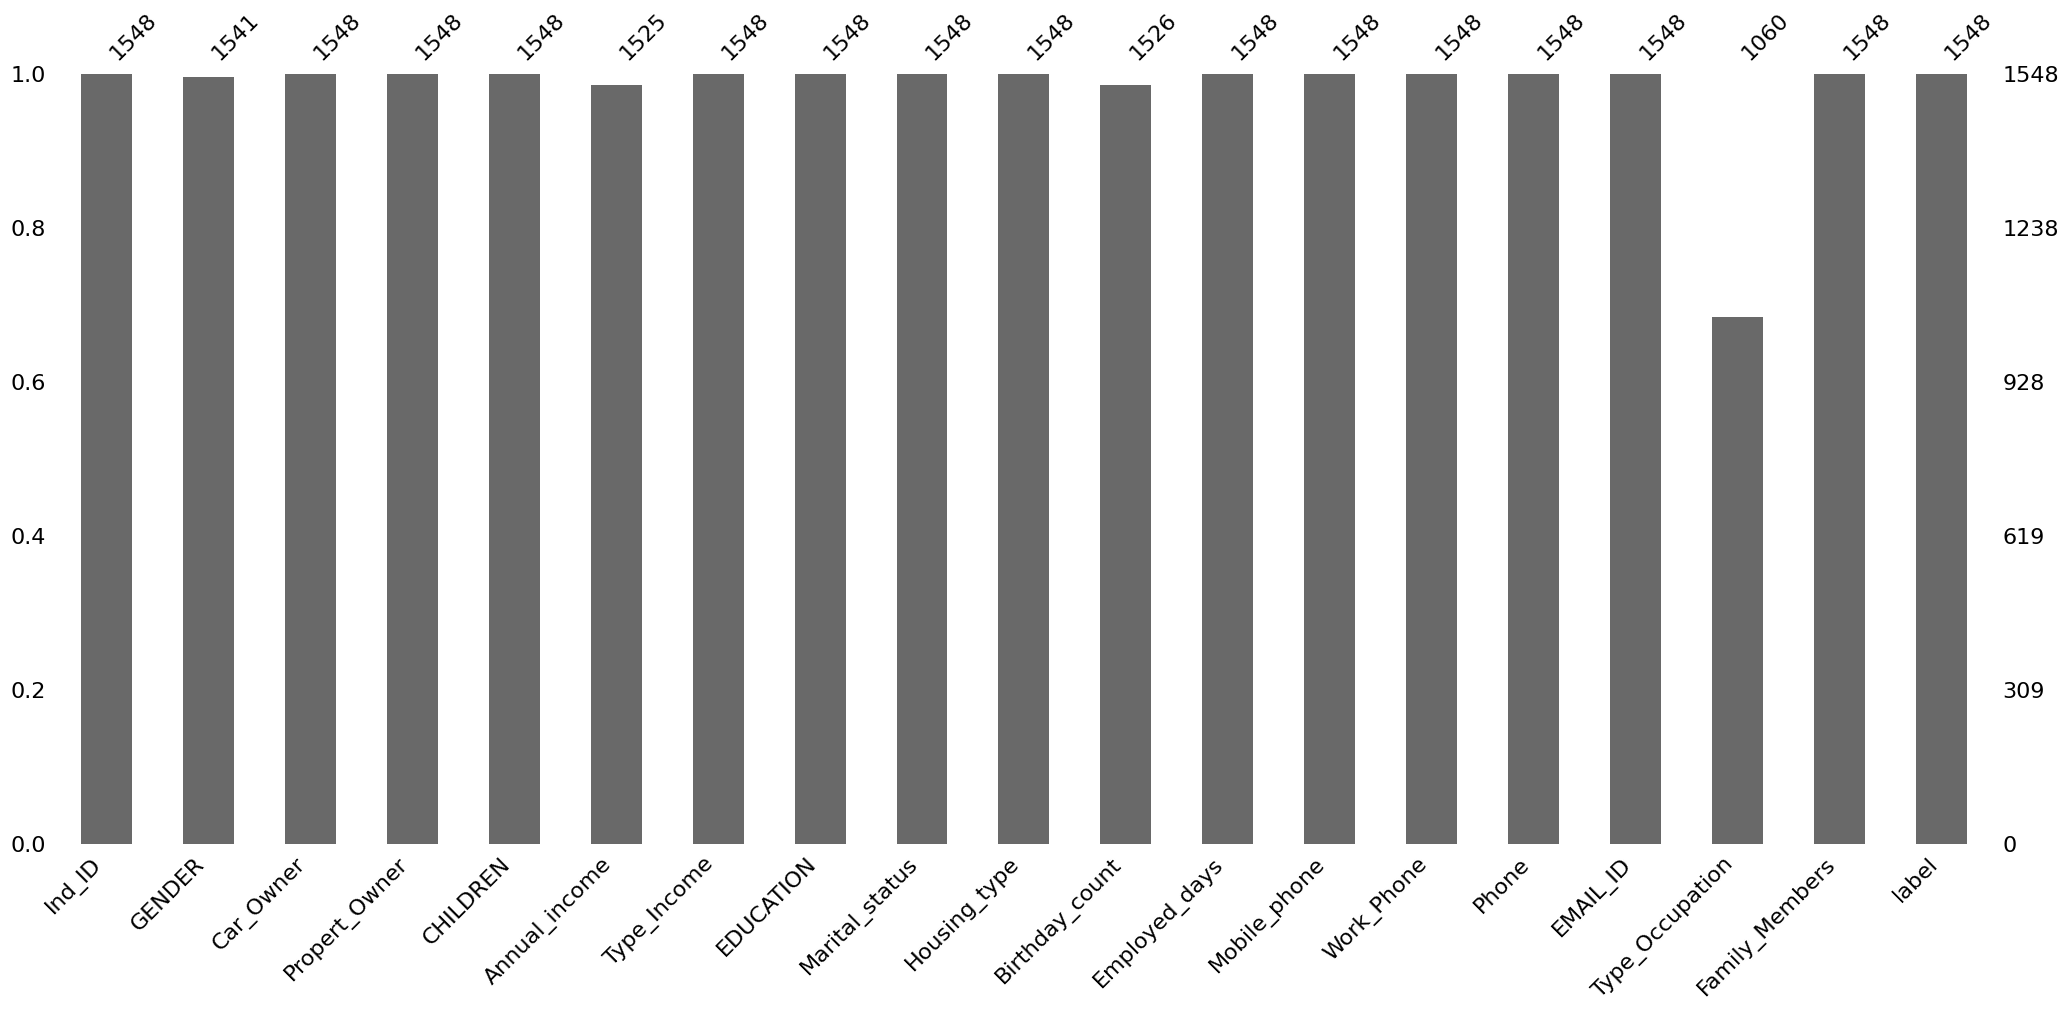

In [12]:
msno.bar(df)

<Axes: >

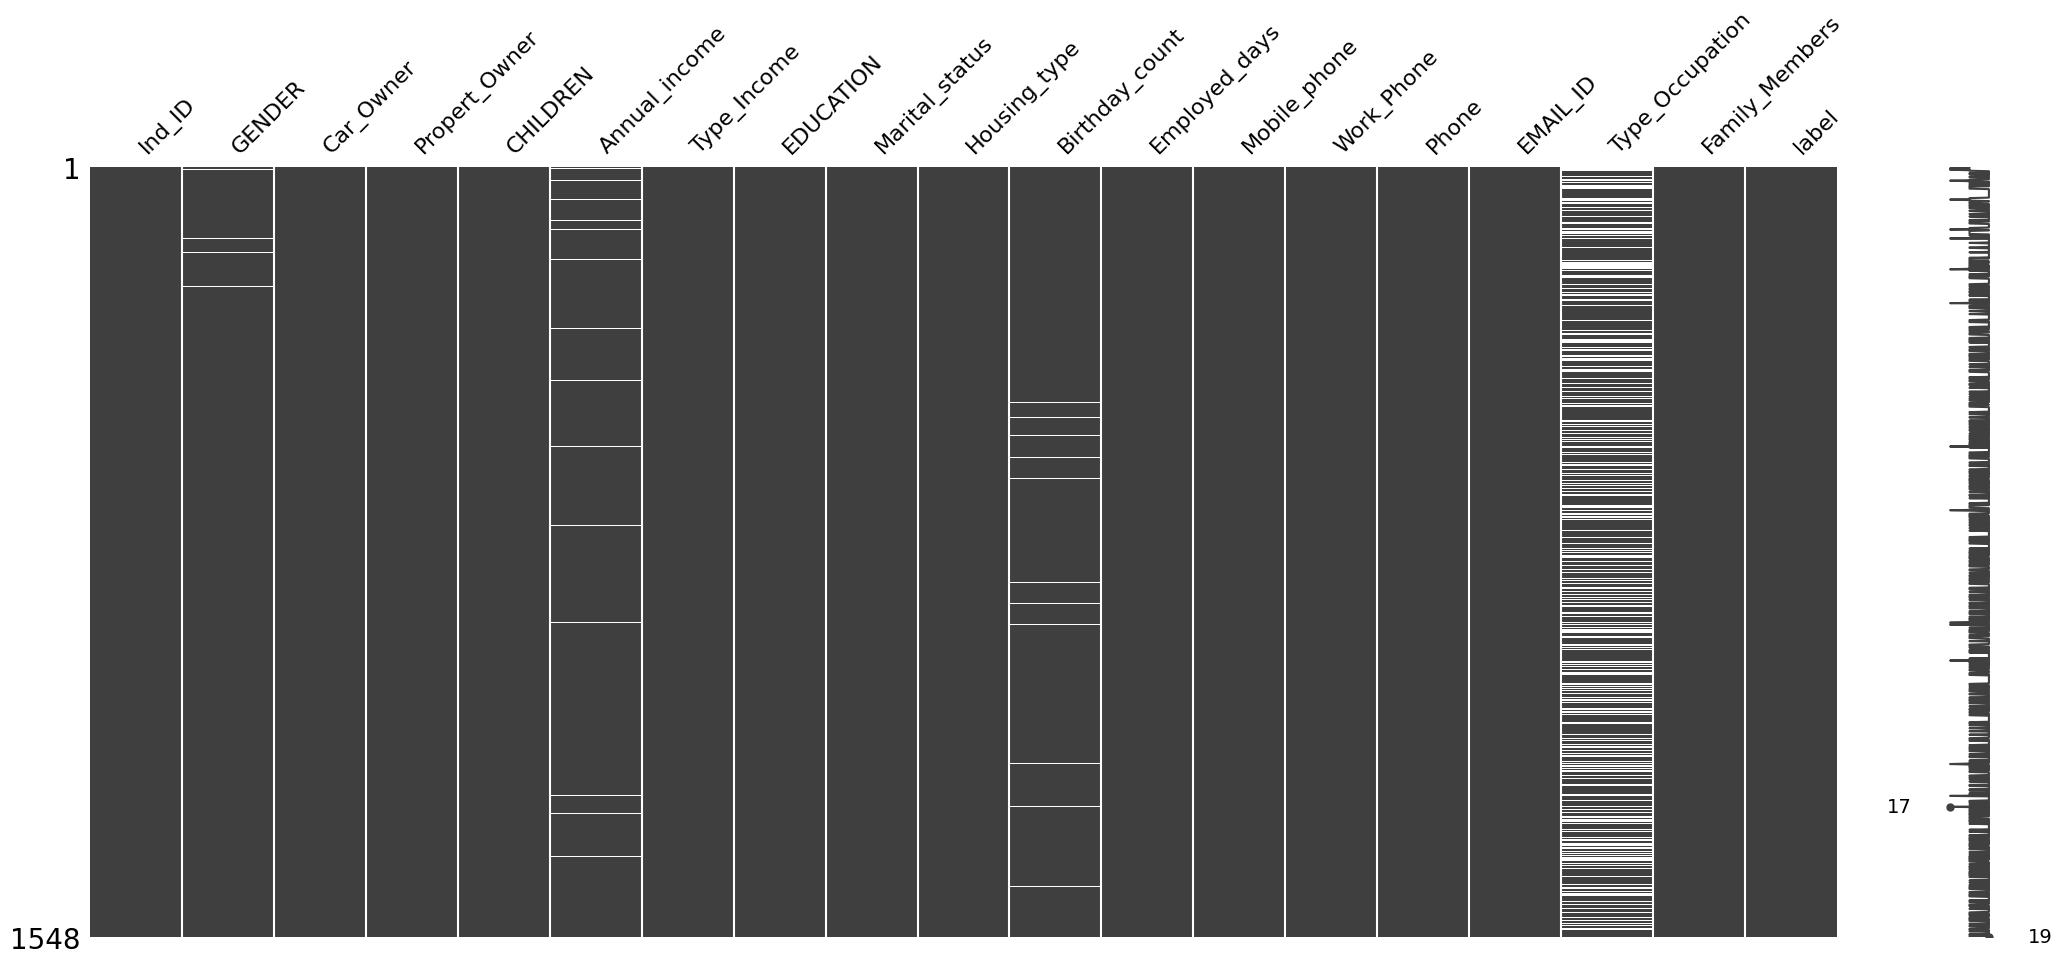

In [13]:
msno.matrix(df)

<Axes: >

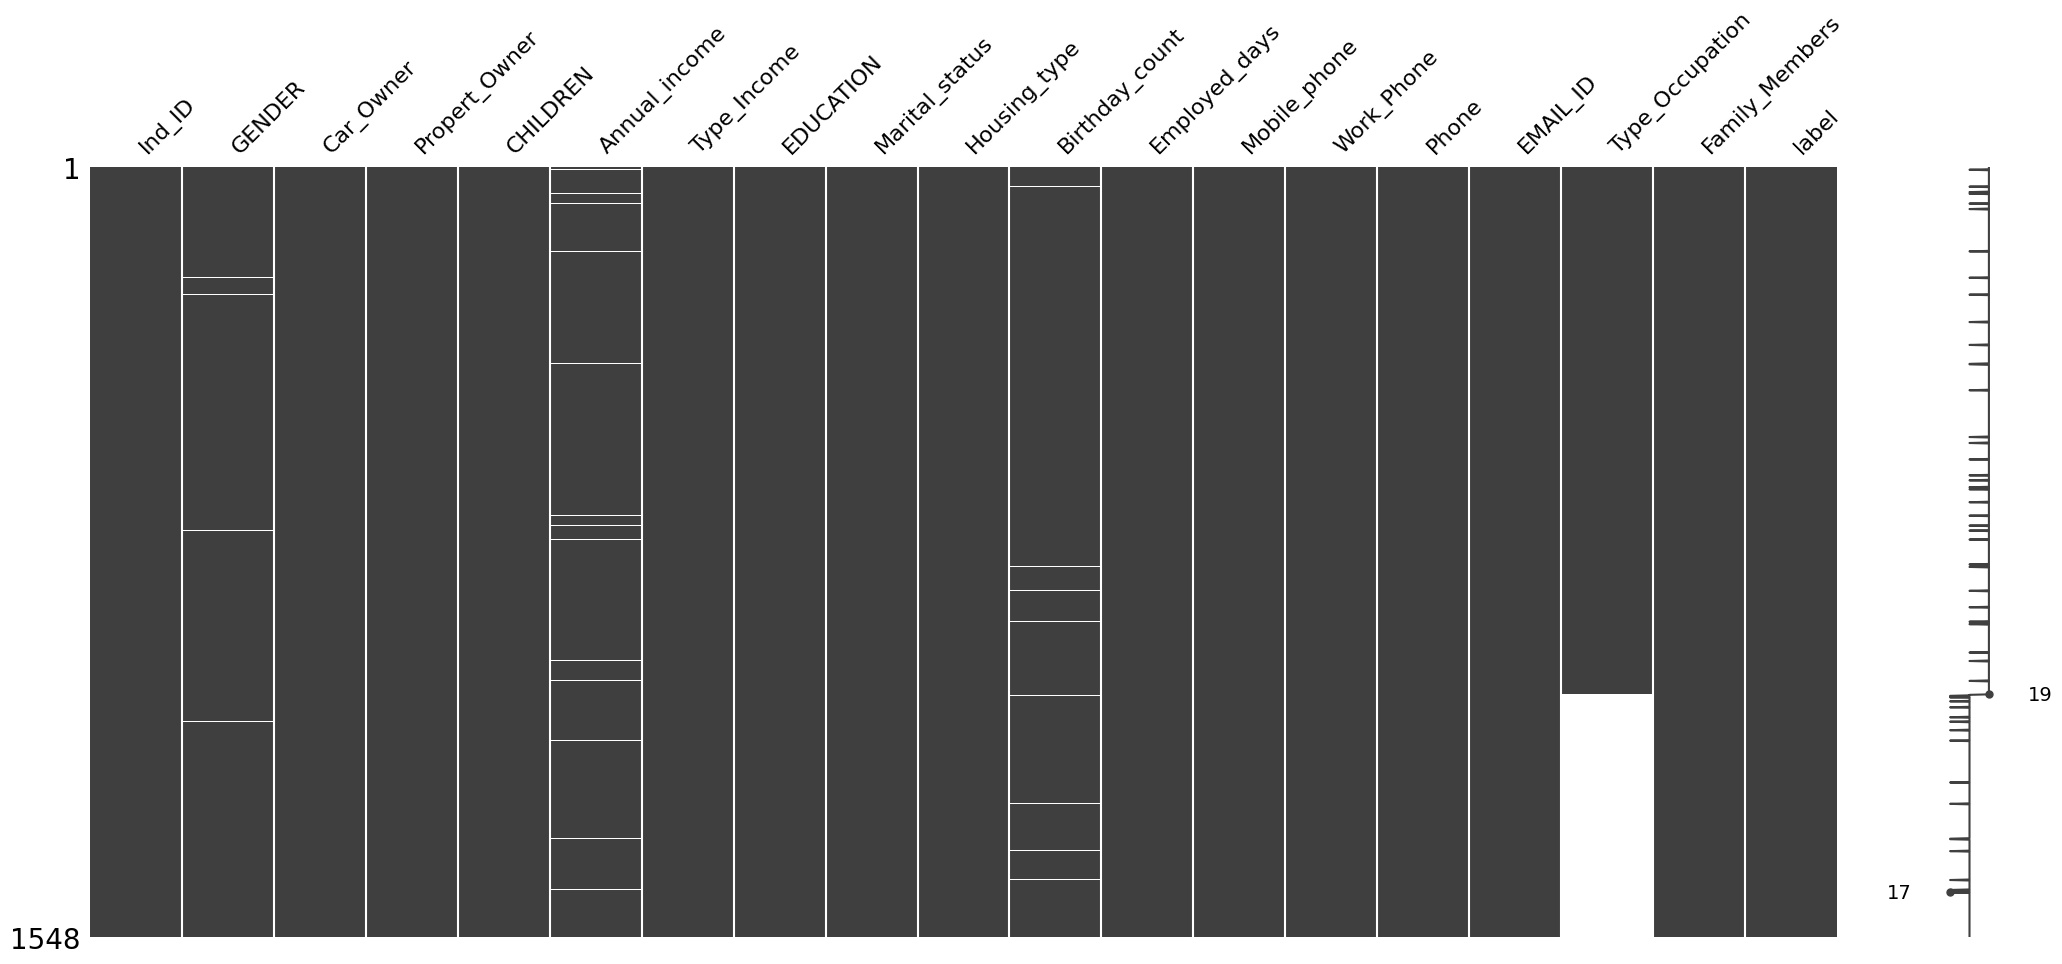

In [14]:
sorted = df.sort_values('Type_Occupation') # sorting values based on culmen depth
msno.matrix(sorted)

In [15]:
df['GENDER'].value_counts().index[0]

'F'

In [16]:
def missing_no(df,variable):
  mode=df[variable].value_counts().index[0]
  df[variable].fillna(mode,inplace=True)

Here we have fill values of 'GENDER' with most frequent value.

In [17]:
missing_no(df,'GENDER')

In [18]:
df.isnull().sum()

Ind_ID               0
GENDER               0
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [19]:
df['Annual_income'].mean()

191399.3262295082

In [20]:
def missing_no1(df,variable):
  mean=df[variable].mean()
  df[variable].fillna(mean,inplace=True)

Here we have fill values of 'Annual_income' and 'Birthday_count' with Mean.

In [21]:
missing_no1(df,'Annual_income')

In [22]:
missing_no1(df,'Birthday_count')

In [23]:
df.isnull().sum()

Ind_ID               0
GENDER               0
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income        0
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count       0
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [24]:
def missing_no2(df,variable):
  df[variable]=np.where(df[variable].isnull(),'missing',df[variable])


To deal with the categorial missing value we can either use mice,knn or we can create a new category with "missing" to avoid lossing any information

In [25]:
missing_no2(df,'Type_Occupation')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1548 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1548 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1548 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1548 non-null   object 
 17  Family_Members

# Data exploration using data visualization

# Univariate analysis

Dependent variable

In [27]:
df['label'].value_counts()

0    1373
1     175
Name: label, dtype: int64

<Axes: >

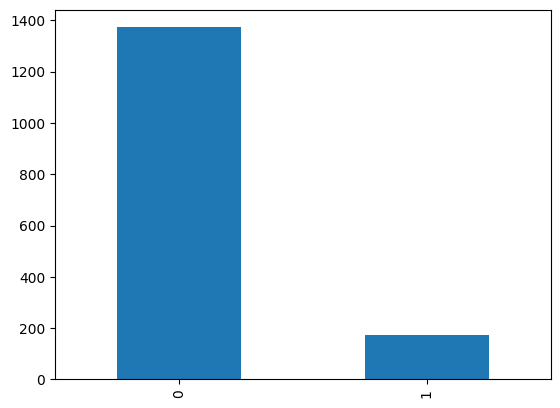

In [28]:
df['label'].value_counts().plot.bar()

<Axes: ylabel='label'>

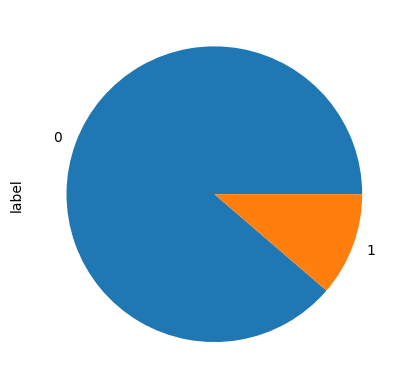

In [29]:
df['label'].value_counts().plot(kind='pie')

There are 175 out of 1548 ( about 12% ) wasn't approved

#Independent Variables (Categorical)


<Axes: title={'center': 'Type_Occupation'}>

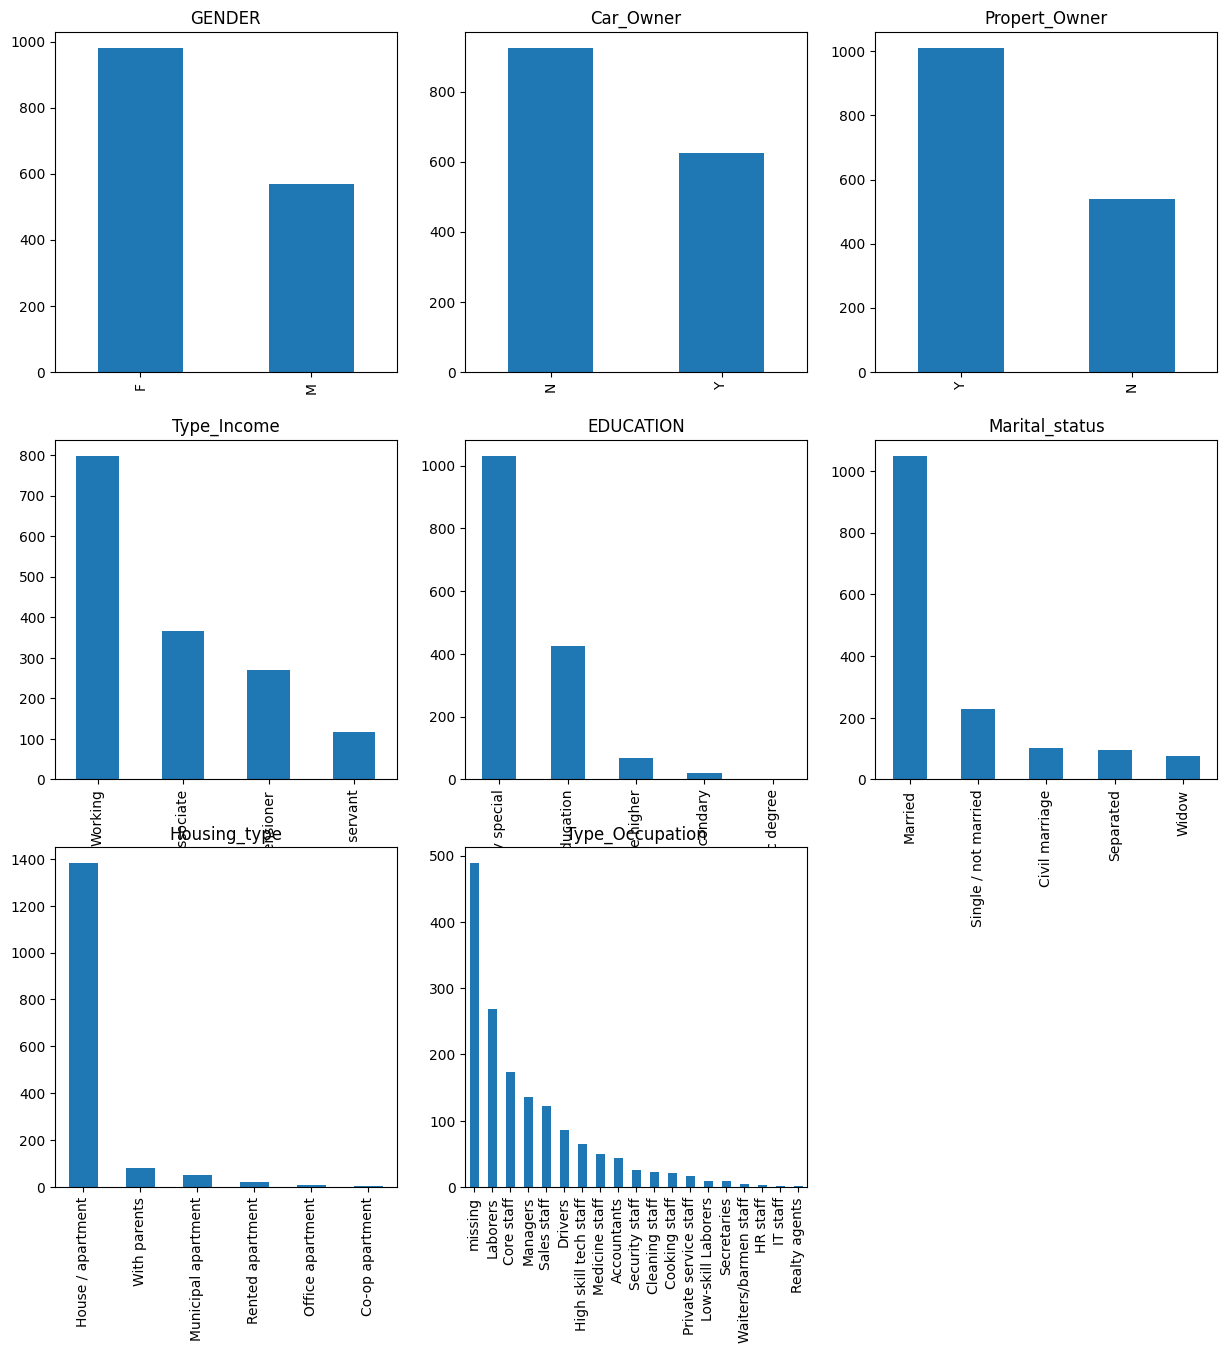

In [30]:
plt.subplot(3,3,1)
df['GENDER'].value_counts().plot.bar(title='GENDER', figsize=(15, 15))

plt.subplot(3,3,2)
df['Car_Owner'].value_counts().plot.bar(title='Car_Owner')

plt.subplot(3,3,3)
df['Propert_Owner'].value_counts().plot.bar(title='Propert_Owner')

plt.subplot(3,3,4)
df['Type_Income'].value_counts().plot.bar(title='Type_Income')

plt.subplot(3,3,5)
df['EDUCATION'].value_counts().plot.bar(title='EDUCATION')

plt.subplot(3,3,6)
df['Marital_status'].value_counts().plot.bar(title='Marital_status')

plt.subplot(3,3,7)
df['Housing_type'].value_counts().plot.bar(title='Housing_type')

plt.subplot(3,3,8)
df['Type_Occupation'].value_counts().plot.bar(title='Type_Occupation')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1548 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1548 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1548 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1548 non-null   object 
 17  Family_Members

# Independent Variable (Numerical)

<Axes: >

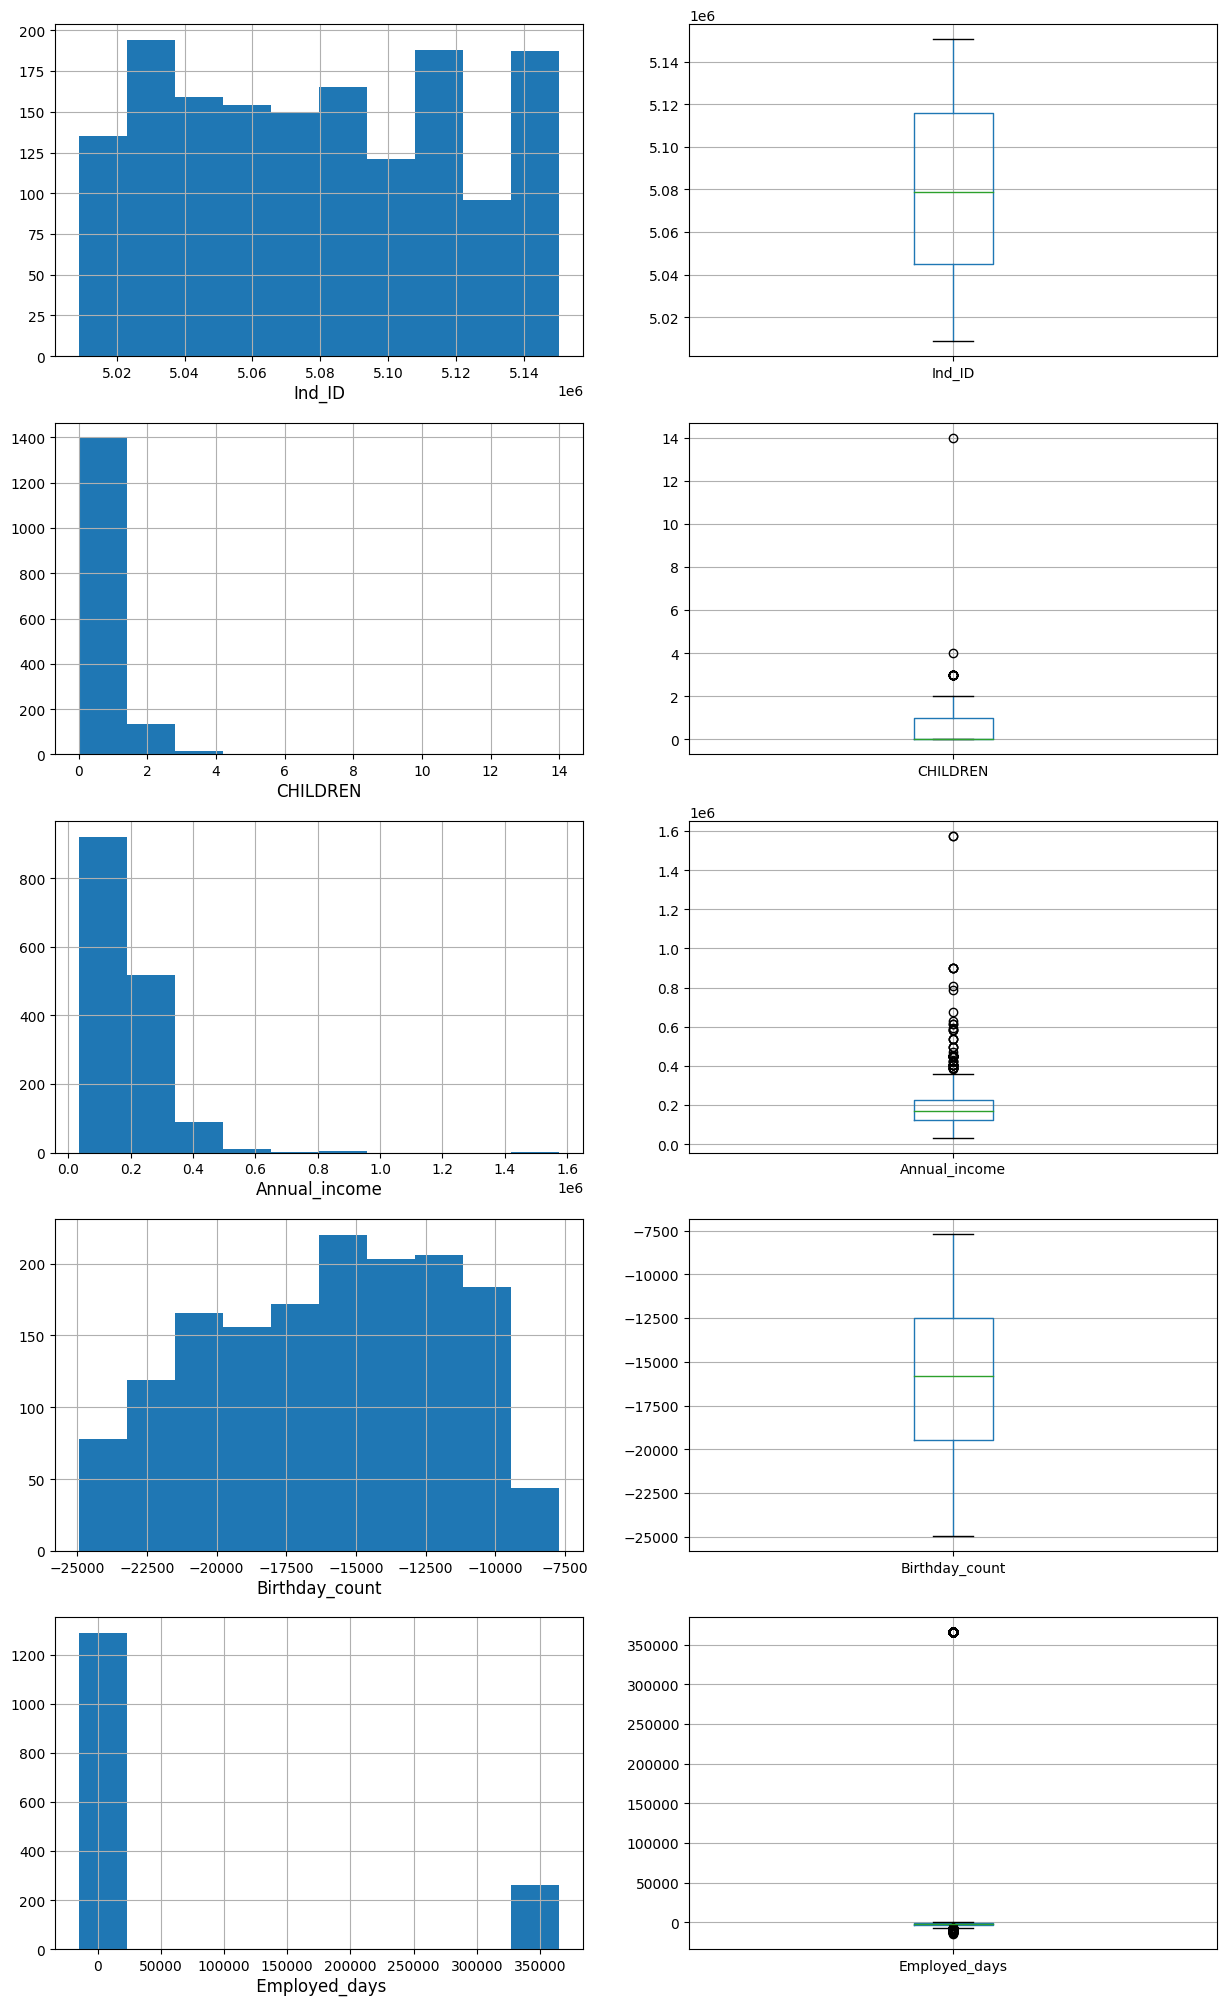

In [32]:
plt.subplot(5,2,1)
plt.title('Ind_ID', y=-0.15)
df['Ind_ID'].hist(figsize=(15, 25))

plt.subplot(5,2,2)
df.boxplot(column='Ind_ID')

plt.subplot(5,2,3)
plt.title('CHILDREN', y=-0.15)
df['CHILDREN'].hist()

plt.subplot(5,2,4)
df.boxplot(column='CHILDREN')

plt.subplot(5,2,5)
plt.title('Annual_income', y=-0.15)
df['Annual_income'].hist()

plt.subplot(5,2,6)
df.boxplot(column='Annual_income')

plt.subplot(5,2,7)
plt.title('Birthday_count', y=-0.15)
df['Birthday_count'].hist()

plt.subplot(5,2,8)
df.boxplot(column='Birthday_count')

plt.subplot(5,2,9)
plt.title(' Employed_days', y=-0.15)
df['Employed_days'].hist()

plt.subplot(5,2,10)
df.boxplot(column='Employed_days')


<Axes: >

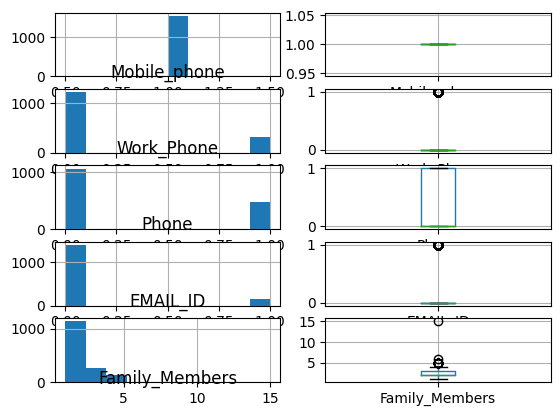

In [33]:
plt.subplot(5,2,1)
plt.title('Mobile_phone', y=-0.15)
df['Mobile_phone'].hist()

plt.subplot(5,2,2)
df.boxplot(column='Mobile_phone')

plt.subplot(5,2,3)
plt.title('Work_Phone', y=-0.15)
df['Work_Phone'].hist()

plt.subplot(5,2,4)
df.boxplot(column='Work_Phone')

plt.subplot(5,2,5)
plt.title('Phone', y=-0.15)
df['Phone'].hist()

plt.subplot(5,2,6)
df.boxplot(column='Phone')

plt.subplot(5,2,7)
plt.title('EMAIL_ID', y=-0.15)
df['EMAIL_ID'].hist()

plt.subplot(5,2,8)
df.boxplot(column='EMAIL_ID')

plt.subplot(5,2,9)
plt.title('Family_Members', y=-0.15)
df['Family_Members'].hist()

plt.subplot(5,2,10)
df.boxplot(column='Family_Members')

<Axes: >

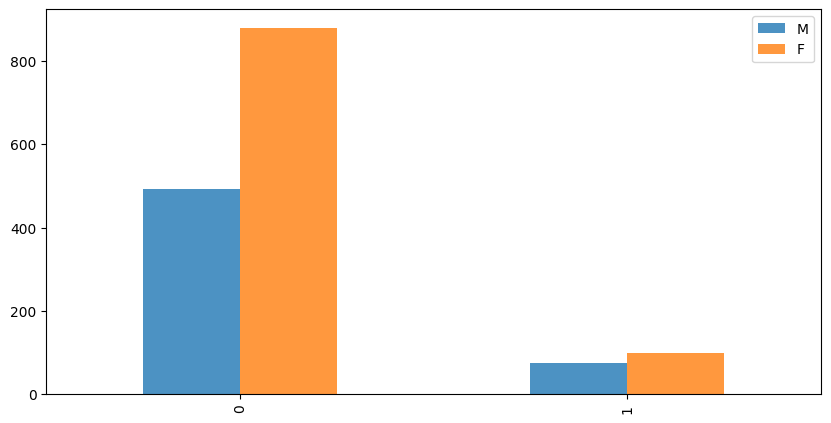

In [34]:
df_m= df.label[df.GENDER == 'M'].value_counts()
df_f = df.label[df.GENDER == 'F'].value_counts()
df_viz_1 = pd.DataFrame({'M': df_m, 'F': df_f})
df_viz_1.plot(kind='bar', alpha=0.8, stacked=False, figsize=(10,5))

<Axes: >

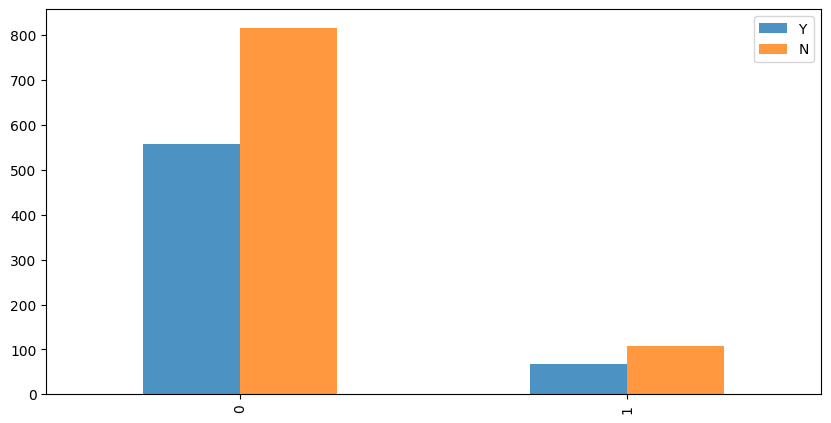

In [35]:
df_y= df.label[df.Car_Owner == 'Y'].value_counts()
df_n = df.label[df.Car_Owner == 'N'].value_counts()
df_viz_1 = pd.DataFrame({'Y': df_y, 'N': df_n})
df_viz_1.plot(kind='bar', alpha=0.8, stacked=False, figsize=(10,5))

<Axes: >

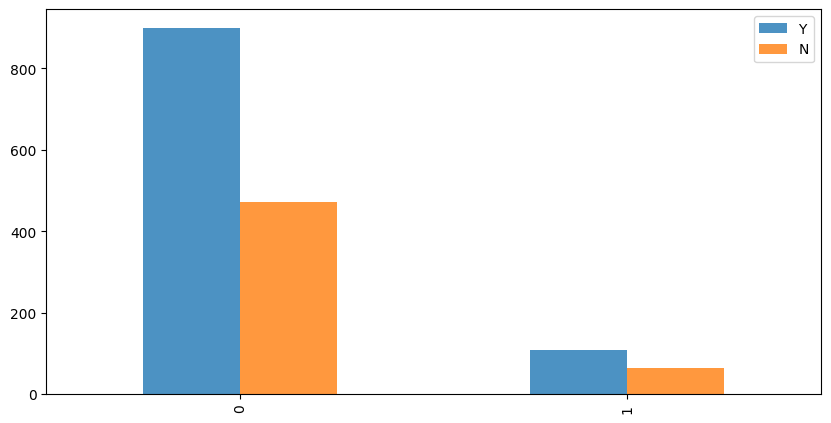

In [36]:
df_y= df.label[df.Propert_Owner == 'Y'].value_counts()
df_n = df.label[df.Propert_Owner == 'N'].value_counts()
df_viz_1 = pd.DataFrame({'Y': df_y, 'N': df_n})
df_viz_1.plot(kind='bar', alpha=0.8, stacked=False, figsize=(10,5))

<Axes: >

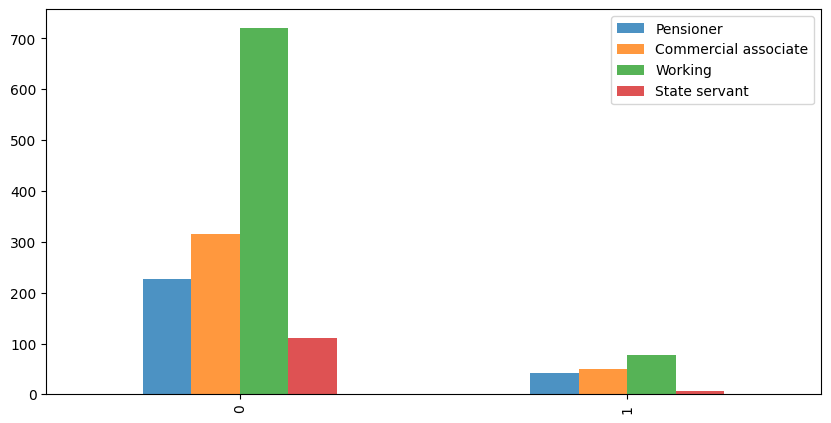

In [37]:
df_p= df.label[df.Type_Income == 'Pensioner'].value_counts()
df_c = df.label[df.Type_Income == 'Commercial associate'].value_counts()
df_w= df.label[df.Type_Income == 'Working'].value_counts()
df_s = df.label[df.Type_Income == 'State servant'].value_counts()
df_viz_1 = pd.DataFrame({'Pensioner': df_p, 'Commercial associate': df_c, 'Working': df_w, 'State servant':df_s})
df_viz_1.plot(kind='bar', alpha=0.8, stacked=False, figsize=(10,5))

<Axes: >

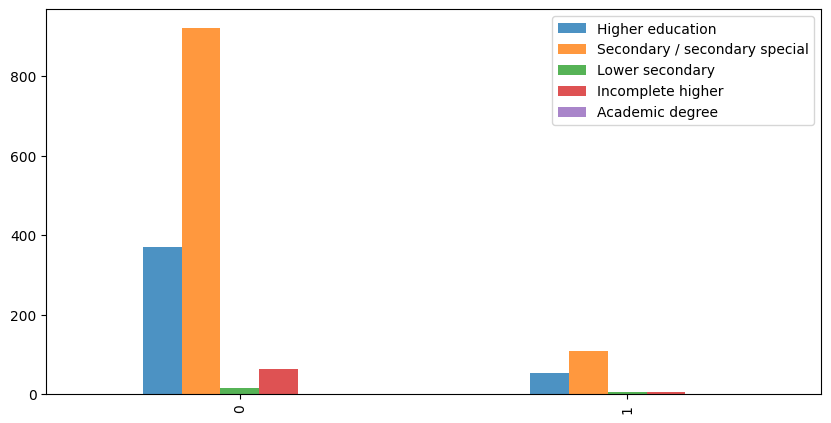

In [38]:
df_he= df.label[df.EDUCATION == 'Higher education'].value_counts()
df_s = df.label[df.EDUCATION == 'Secondary / secondary special'].value_counts()
df_ls= df.label[df.EDUCATION == 'Lower secondary'].value_counts()
df_ih = df.label[df.EDUCATION == 'Incomplete higher'].value_counts()
df_ad = df.label[df.EDUCATION == 'Academic degree'].value_counts()
df_viz_1 = pd.DataFrame({'Higher education': df_he, 'Secondary / secondary special': df_s, 'Lower secondary': df_ls, 'Incomplete higher':df_ih, 'Academic degree':df_ad})
df_viz_1.plot(kind='bar', alpha=0.8, stacked=False, figsize=(10,5))

<Axes: >

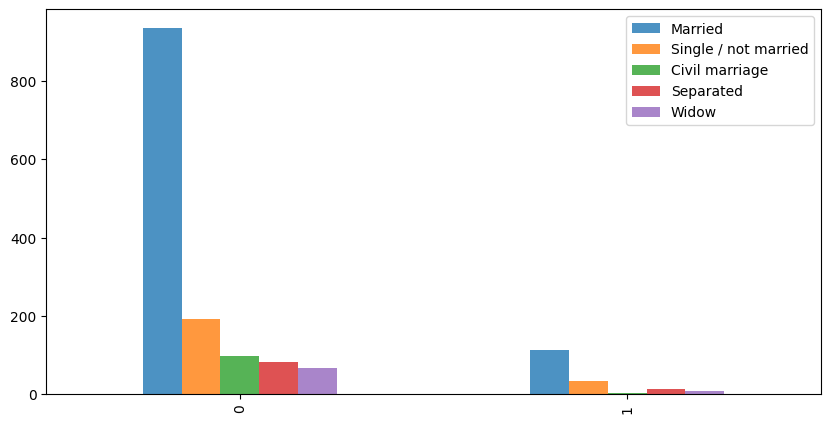

In [39]:
df_m= df.label[df.Marital_status == 'Married'].value_counts()
df_s = df.label[df.Marital_status == 'Single / not married'].value_counts()
df_cm= df.label[df.Marital_status == 'Civil marriage'].value_counts()
df_se = df.label[df.Marital_status == 'Separated'].value_counts()
df_w = df.label[df.Marital_status == 'Widow'].value_counts()
df_viz_1 = pd.DataFrame({'Married': df_m, 'Single / not married': df_s, 'Civil marriage': df_cm, 'Separated':df_se, 'Widow':df_w})
df_viz_1.plot(kind='bar', alpha=0.8, stacked=False, figsize=(10,5))

<Axes: >

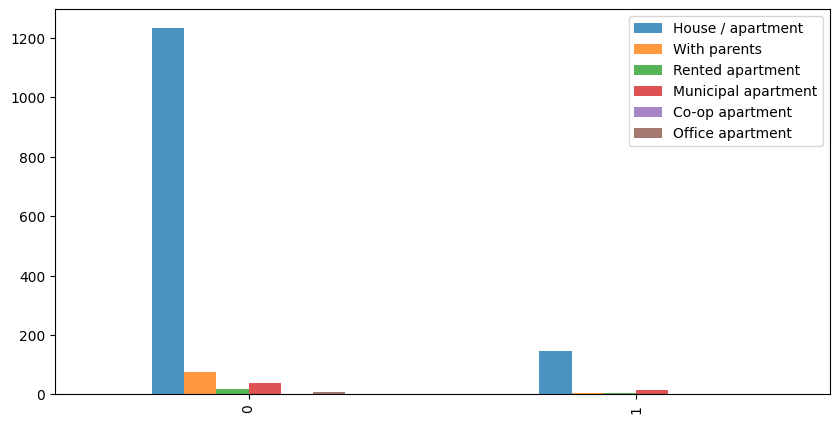

In [40]:
df_h= df.label[df.Housing_type == 'House / apartment'].value_counts()
df_p = df.label[df.Housing_type == 'With parents'].value_counts()
df_ra= df.label[df.Housing_type == 'Rented apartment'].value_counts()
df_ma = df.label[df.Housing_type == 'Municipal apartment'].value_counts()
df_co = df.label[df.Housing_type == 'Co-op apartment'].value_counts()
df_off = df.label[df.Housing_type == 'Office apartment'].value_counts()
df_viz_1 = pd.DataFrame({'House / apartment': df_h, 'With parents': df_p, 'Rented apartment': df_ra, 'Municipal apartment':df_ma, 'Co-op apartment':df_co, 'Office apartment':df_off})
df_viz_1.plot(kind='bar', alpha=0.8, stacked=False, figsize=(10,5))

<Axes: xlabel='Type_Occupation'>

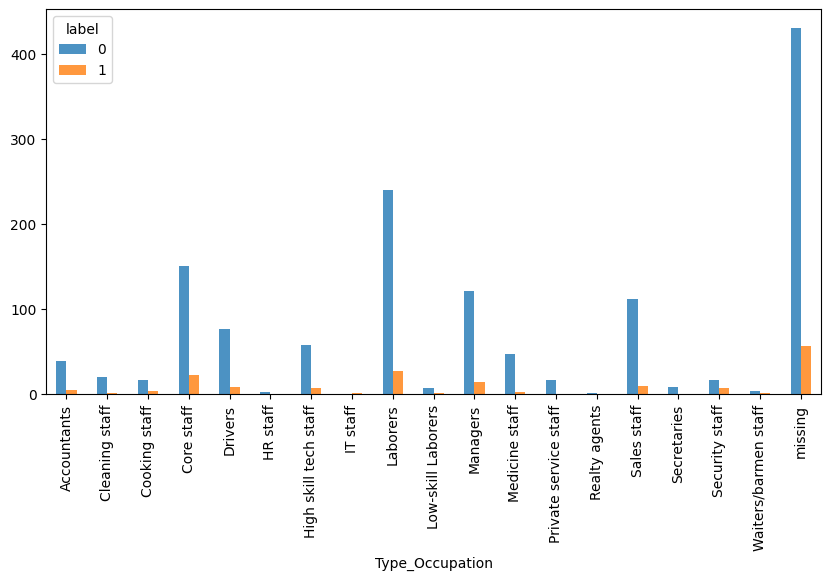

In [41]:
df_viz_1 = df.groupby('Type_Occupation')['label'].value_counts().unstack()
df_viz_1.plot(kind='bar', alpha=0.8, stacked=False, figsize=(10,5))

In [42]:
df = df.drop(['Ind_ID','Mobile_phone'], axis=1)

In [43]:
df.head(1)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,0,0,0,missing,2,1


In [44]:
for col in df.select_dtypes(include=np.number).columns:
    print(f"Skewness of {col} is {df[col].skew()}")

Skewness of CHILDREN is 4.631121894695182
Skewness of Annual_income is 3.9539906923740133
Skewness of Birthday_count is -0.17231310329107838
Skewness of Employed_days is 1.770964333419757
Skewness of Work_Phone is 1.4401787712531133
Skewness of Phone is 0.8253089366272789
Skewness of EMAIL_ID is 2.818216280851602
Skewness of Family_Members is 2.2322733446463294
Skewness of label is 2.4463786084073944


In [45]:
from scipy.stats import zscore

def filter_zscore(df, column_name):
    print(f"====== {column_name} ======")
    print(f"Mean of values is: {df[column_name].mean()}")
    print(f"Stanndard Deviation of values is: {df[column_name].std()}\n")
    print(f"length of data before filtering is {len(df)}")        
    filtered = df[(np.abs(zscore(df[column_name], nan_policy='omit')) < 3)]
    print(f"length of data after filtering is {len(filtered)}")
    return filtered.index.tolist()

index_set = set(df.index.tolist())
for col in df.select_dtypes(include=np.number).columns:
    index_set = set(filter_zscore(df, col)).intersection(index_set)

df = df.loc[set(index_set)]
df

====== CHILDREN ======
Mean of values is: 0.4127906976744186
Stanndard Deviation of values is: 0.7766912834771466

length of data before filtering is 1548
length of data after filtering is 1530
====== Annual_income ======
Mean of values is: 191399.32622950824
Stanndard Deviation of values is: 112407.9513177418

length of data before filtering is 1548
length of data after filtering is 1529
====== Birthday_count ======
Mean of values is: -16040.342070773264
Stanndard Deviation of values is: 4199.321476683728

length of data before filtering is 1548
length of data after filtering is 1548
====== Employed_days ======
Mean of values is: 59364.68992248062
Stanndard Deviation of values is: 137808.06270119493

length of data before filtering is 1548
length of data after filtering is 1548
====== Work_Phone ======
Mean of values is: 0.20801033591731266
Stanndard Deviation of values is: 0.4060154274970684

length of data before filtering is 1548
length of data after filtering is 1548
====== Phone 

<ipython-input-45-908c211452f9>:16: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df = df.loc[set(index_set)]


,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,-18772.000000,365243,0,0,0,missing,2,1
1,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,0,missing,2,1
2,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-16040.342071,-586,1,1,0,missing,2,1
3,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,0,missing,2,1
4,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,0,missing,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,F,N,Y,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-11957.000000,-2182,0,0,0,Managers,2,0
1544,F,N,N,0,225000.00000,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.000000,-1209,0,0,0,Accountants,1,0
1545,M,Y,Y,2,180000.00000,Working,Higher education,Married,House / apartment,-13174.000000,-2477,0,0,0,Managers,4,0
1546,M,Y,N,0,270000.00000,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.000000,-645,1,1,0,Drivers,2,0


# Now we have to perform encoding in our categorical columns in our dataset to bring into numberical values

In [ ]:
## 'GENDER','Car_Owner','Propert_Owner','Type_Income','EDUCATION','Marital_status','Housing_type','Type_Occupation '

In [46]:
df['Type_Occupation'].unique()

array(['missing', 'Cooking staff', 'Laborers', 'Sales staff',
       'Accountants', 'High skill tech staff', 'Cleaning staff',
       'Drivers', 'Low-skill Laborers', 'Managers', 'Core staff',
       'Medicine staff', 'Security staff', 'Private service staff',
       'HR staff', 'Secretaries', 'Realty agents', 'Waiters/barmen staff'],
      dtype=object)

# With the help of dictionary and mapping function we are labeling my columns

In [47]:
dict1={'M':1,'F':0}

In [48]:
df['GENDER']=df['GENDER'].map(dict1)

In [49]:
dict2={'Y':1,'N':0}

In [50]:
df['Car_Owner']=df['Car_Owner'].map(dict2)

In [51]:
dict3={'Y':1,'N':0}

In [52]:
df['Propert_Owner']=df['Propert_Owner'].map(dict3)

In [53]:
dict4={'State servant':1,'Commercial associate':2, 'Working':3,'Pensioner':4}

In [54]:
df['Type_Income']=df['Type_Income'].map(dict4)

In [55]:
dict5={'Higher education':1,'Incomplete higher':2,'Secondary / secondary special':3, 'Lower secondary':4,'Academic degree':5}

In [56]:
df['EDUCATION']=df['EDUCATION'].map(dict5)

In [57]:
dict6={'Married':1,'Single / not married':2,'Civil marriage':3, 'Separated':4,'Widow':5}

In [58]:
df['Marital_status']=df['Marital_status'].map(dict6)

In [59]:
dict7={'House / apartment':1,'With parents':2,'Rented apartment':3, 'Municipal apartment':4,'Co-op apartment':5,'Office apartment':6}

In [60]:
df['Housing_type']=df['Housing_type'].map(dict7)

In [61]:
dict8={'missing':1,'Core staff':2, 'Cooking staff':3, 'Laborers':4,'Sales staff':5, 'Accountants':6, 'High skill tech staff':7,'Managers':8,'Cleaning staff':9 ,'Drivers':10, 'Low-skill Laborers':11, 'IT staff':12,'Waiters/barmen staff':13, 'Security staff':14, 'Medicine staff':15,'Private service staff':16, 'HR staff':17, 'Secretaries':18,'Realty agents':19}

In [62]:
df['Type_Occupation']=df['Type_Occupation'].map(dict8)

In [63]:
df.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,1,1,1,0,180000.00000,4,1,1,1,-18772.000000,365243,0,0,0,1,2,1
1,0,1,0,0,315000.00000,2,1,1,1,-13557.000000,-586,1,1,0,1,2,1
2,0,1,0,0,315000.00000,2,1,1,1,-16040.342071,-586,1,1,0,1,2,1
3,0,1,0,0,191399.32623,2,1,1,1,-13557.000000,-586,1,1,0,1,2,1
4,0,1,0,0,315000.00000,2,1,1,1,-13557.000000,-586,1,1,0,1,2,1


# We can also use different approaches..
#For example

In [ ]:
#import category_encoders as ce

#enc = ce.OrdinalEncoder(cols=['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation'])

#df = enc.fit_transform(df)
#df

# Feature Scaling

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df.loc[:, ['Annual_income', 'Birthday_count', 'Employed_days']] = scaler.fit_transform(df.loc[:, ['Annual_income', 'Birthday_count', 'Employed_days']]) 
df

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,1,1,1,0,-0.003036,4,1,1,1,-0.589182,2.098684,0,0,0,1,2,1
1,0,1,0,0,1.643740,2,1,1,1,0.656844,-0.461212,1,1,0,1,2,1
2,0,1,0,0,1.643740,2,1,1,1,0.063496,-0.461212,1,1,0,1,2,1
3,0,1,0,0,0.136017,2,1,1,1,0.656844,-0.461212,1,1,0,1,2,1
4,0,1,0,0,1.643740,2,1,1,1,0.656844,-0.461212,1,1,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,0,0,1,0,0.136017,2,1,1,1,1.039134,-0.472380,0,0,0,8,2,0
1544,0,0,0,0,0.545889,2,2,2,1,1.452007,-0.465572,0,0,0,6,1,0
1545,1,1,1,2,-0.003036,3,1,1,1,0.748355,-0.474444,0,0,0,8,4,0
1546,1,1,0,0,1.094814,3,3,3,1,0.242298,-0.461625,1,1,0,10,2,0


We can also use min max scaler instead of standard scaler

In [65]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [66]:
X.head(1)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,1,1,1,0,-0.003036,4,1,1,1,-0.589182,2.098684,0,0,0,1,2


In [67]:
y.head(1)

0    1
Name: label, dtype: int64

In [69]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Generate models
# Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold 
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [71]:
kf = KFold(n_splits=5, random_state=None)

logreg_1 = LogisticRegression()

total_acc = []

for train_index , val_index in kf.split(x_train):
    X_train , X_val = x_train.iloc[train_index,:],x_train.iloc[val_index,:]
    Y_train , Y_val = y_train.iloc[train_index] , y_train.iloc[val_index]
    
    logreg_1.fit(X_train, Y_train)
    Y_pred = logreg_1.predict(X_val)
    
    acc = accuracy_score(Y_pred , Y_val)
    total_acc.append(acc)
    
avg_acc = sum(total_acc)/5

print(avg_acc)

y_pred = logreg_1.predict(x_test)
print(f"{accuracy_score(y_pred , y_test)}")

0.8804830689083589
0.8982558139534884


# SVM

In [72]:
from sklearn.svm import SVC

SVM_1 = SVC(kernel='rbf')
SVM_1.fit(x_train, y_train)

y_pred = SVM_1.predict(x_test)
print(f"{accuracy_score(y_pred , y_test)}")

0.9098837209302325


# KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier

knn_1 = KNeighborsClassifier()
total_acc = []

for train_index , val_index in kf.split(x_train):
    X_train , X_val = x_train.iloc[train_index,:],x_train.iloc[val_index,:]
    Y_train , Y_val = y_train.iloc[train_index] , y_train.iloc[val_index]
    
    knn_1.fit(X_train, Y_train)
    Y_pred = knn_1.predict(X_val)
    
    acc = accuracy_score(Y_pred , Y_val)
    total_acc.append(acc)
    
avg_acc = sum(total_acc)/5

print(avg_acc)

y_pred = knn_1.predict(x_test)
print(f"{accuracy_score(y_pred , y_test)}")

0.8697987212881838
0.8837209302325582


# Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

total_acc = []

for train_index , val_index in kf.split(x_train):
    X_train , X_val = x_train.iloc[train_index,:],x_train.iloc[val_index,:]
    Y_train , Y_val = y_train.iloc[train_index] , y_train.iloc[val_index]
    
    dt.fit(X_train, Y_train)
    Y_pred = dt.predict(X_val)
    
    acc = accuracy_score(Y_pred , Y_val)
    total_acc.append(acc)
    
avg_acc = sum(total_acc)/5

print(avg_acc)

y_pred = dt.predict(x_test)
print(f"{accuracy_score(y_pred , y_test)}")

0.8445370589628226
0.8517441860465116


<Axes: >

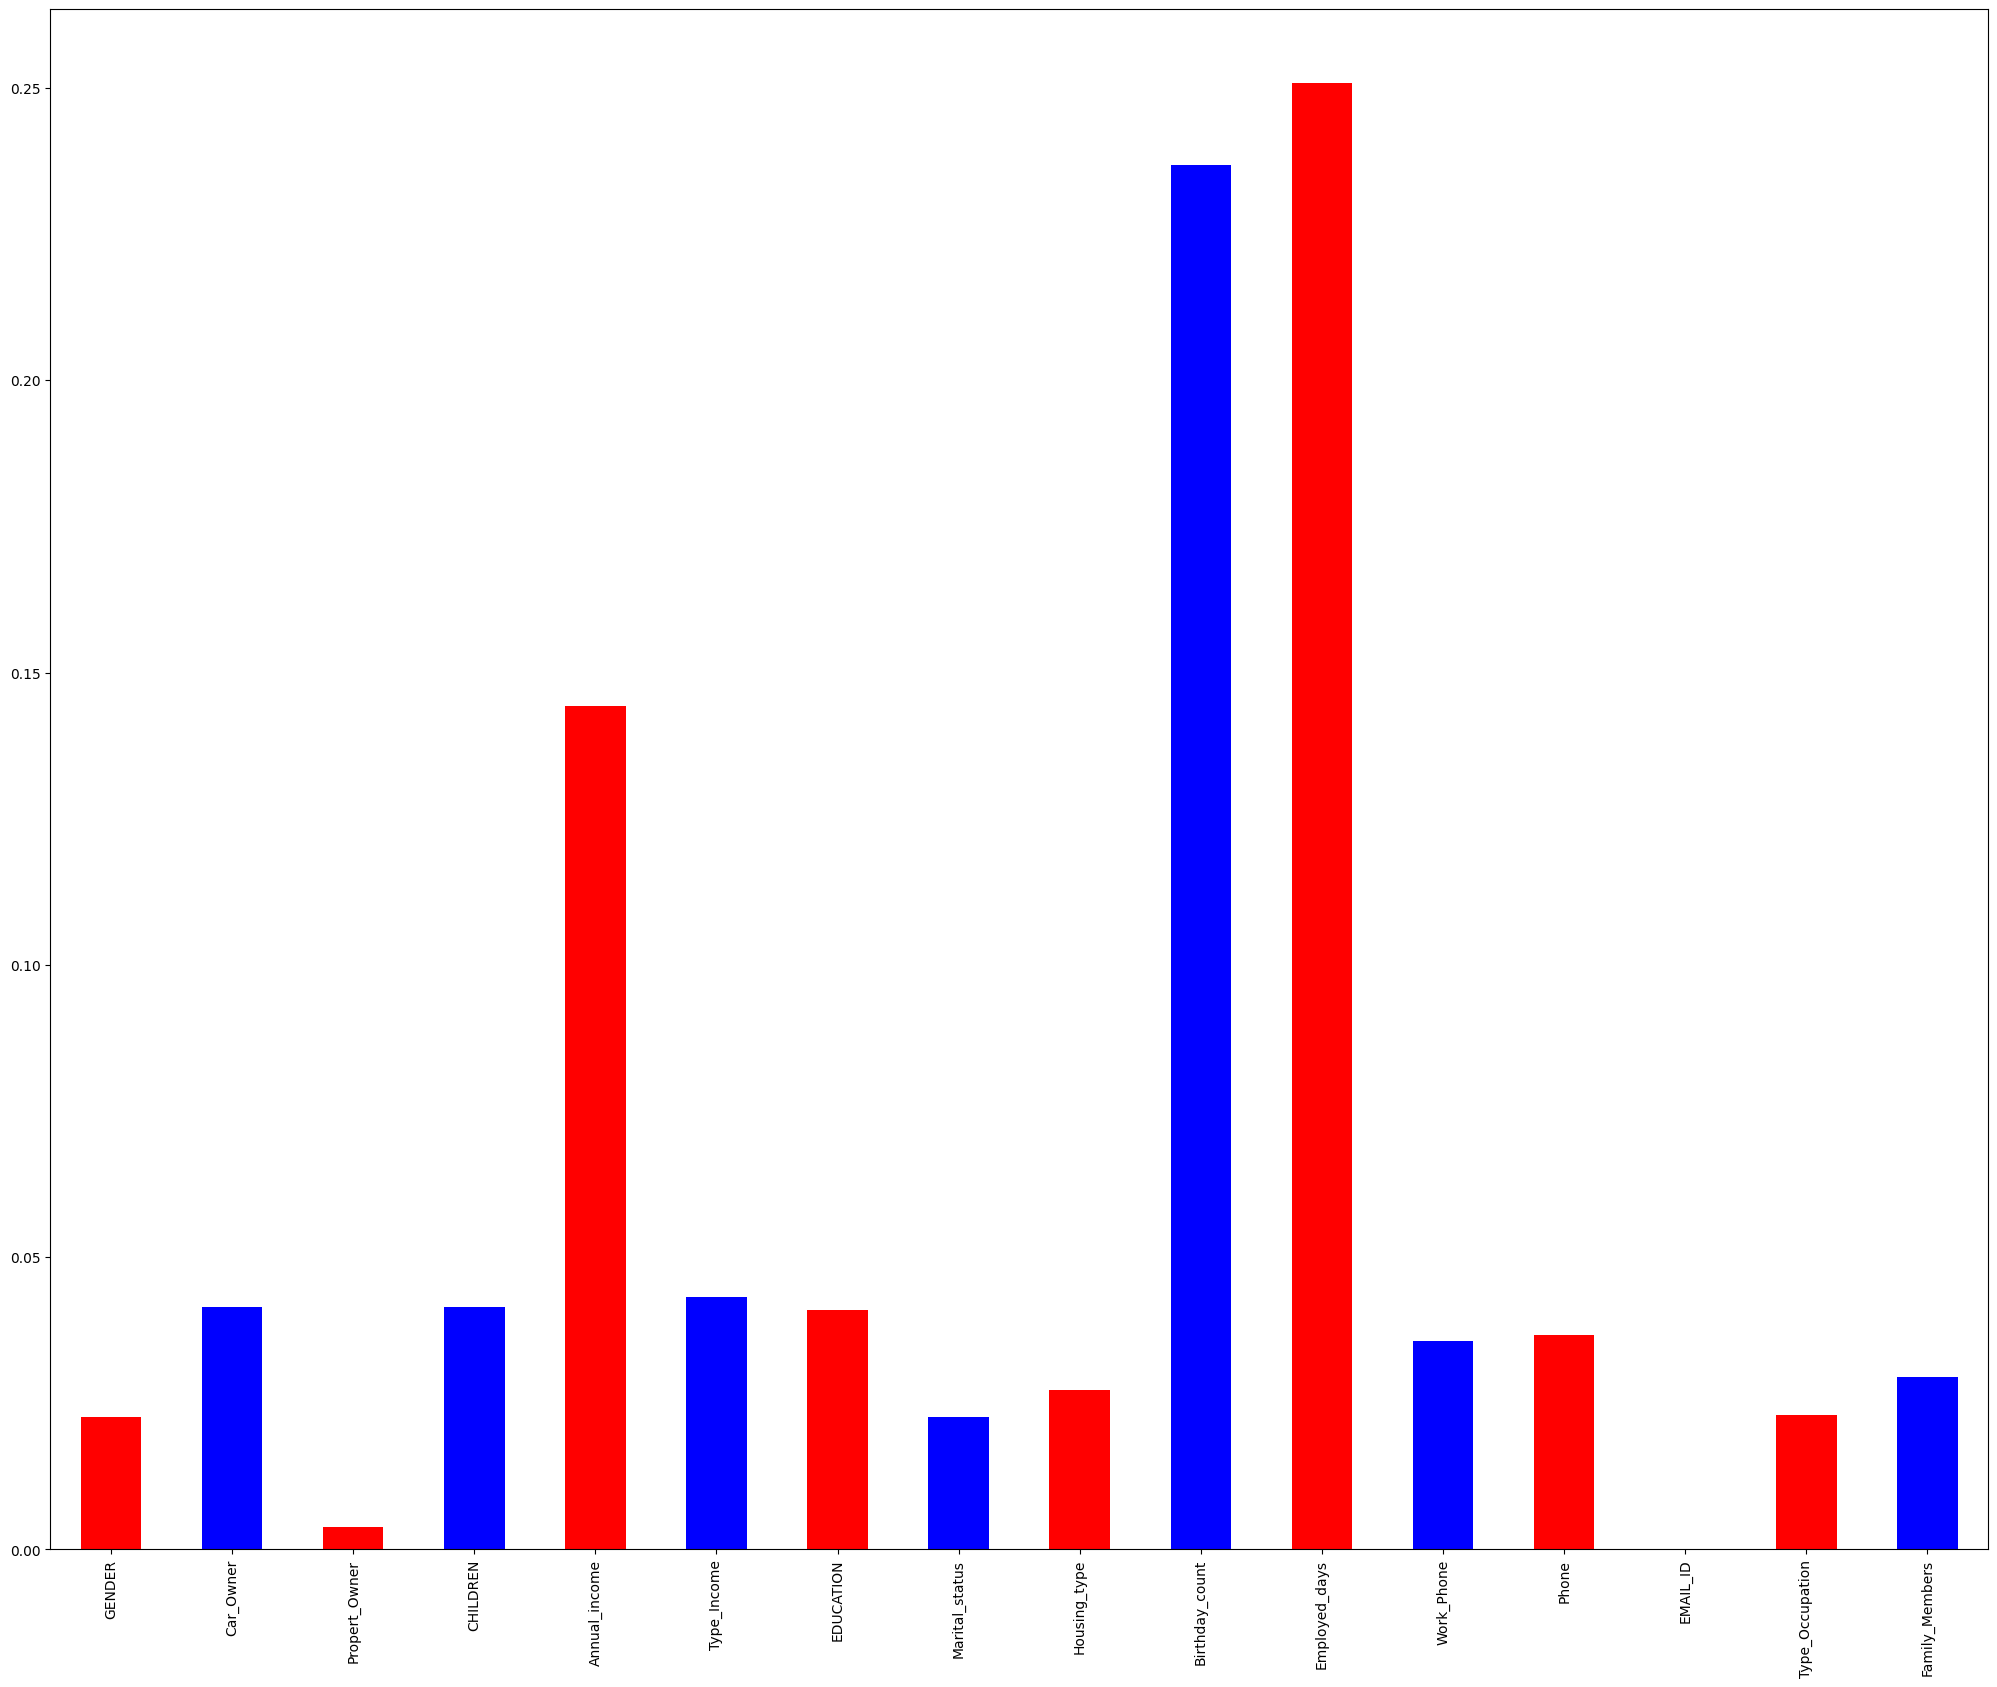

In [75]:
plt.figure(figsize=(25,20))
pd.Series(dt.feature_importances_, index=x_train.columns).plot(kind='bar', color=['red', 'blue'])

# Random forest

In [76]:
from sklearn.ensemble import RandomForestClassifier as RandomForestClassifierScikit

RF_1 = RandomForestClassifierScikit()
total_acc = []

for train_index , val_index in kf.split(x_train):
    X_train , X_val = x_train.iloc[train_index,:],x_train.iloc[val_index,:]
    Y_train , Y_val = y_train.iloc[train_index] , y_train.iloc[val_index]
    
    RF_1.fit(X_train, Y_train)
    Y_pred = RF_1.predict(X_val)
    
    acc = accuracy_score(Y_pred , Y_val)
    total_acc.append(acc)
    
avg_acc = sum(total_acc)/5

print(avg_acc)

y_pred = RF_1.predict(x_test)
print(f"{accuracy_score(y_pred , y_test)}")

0.9222637935117216
0.936046511627907


<Axes: >

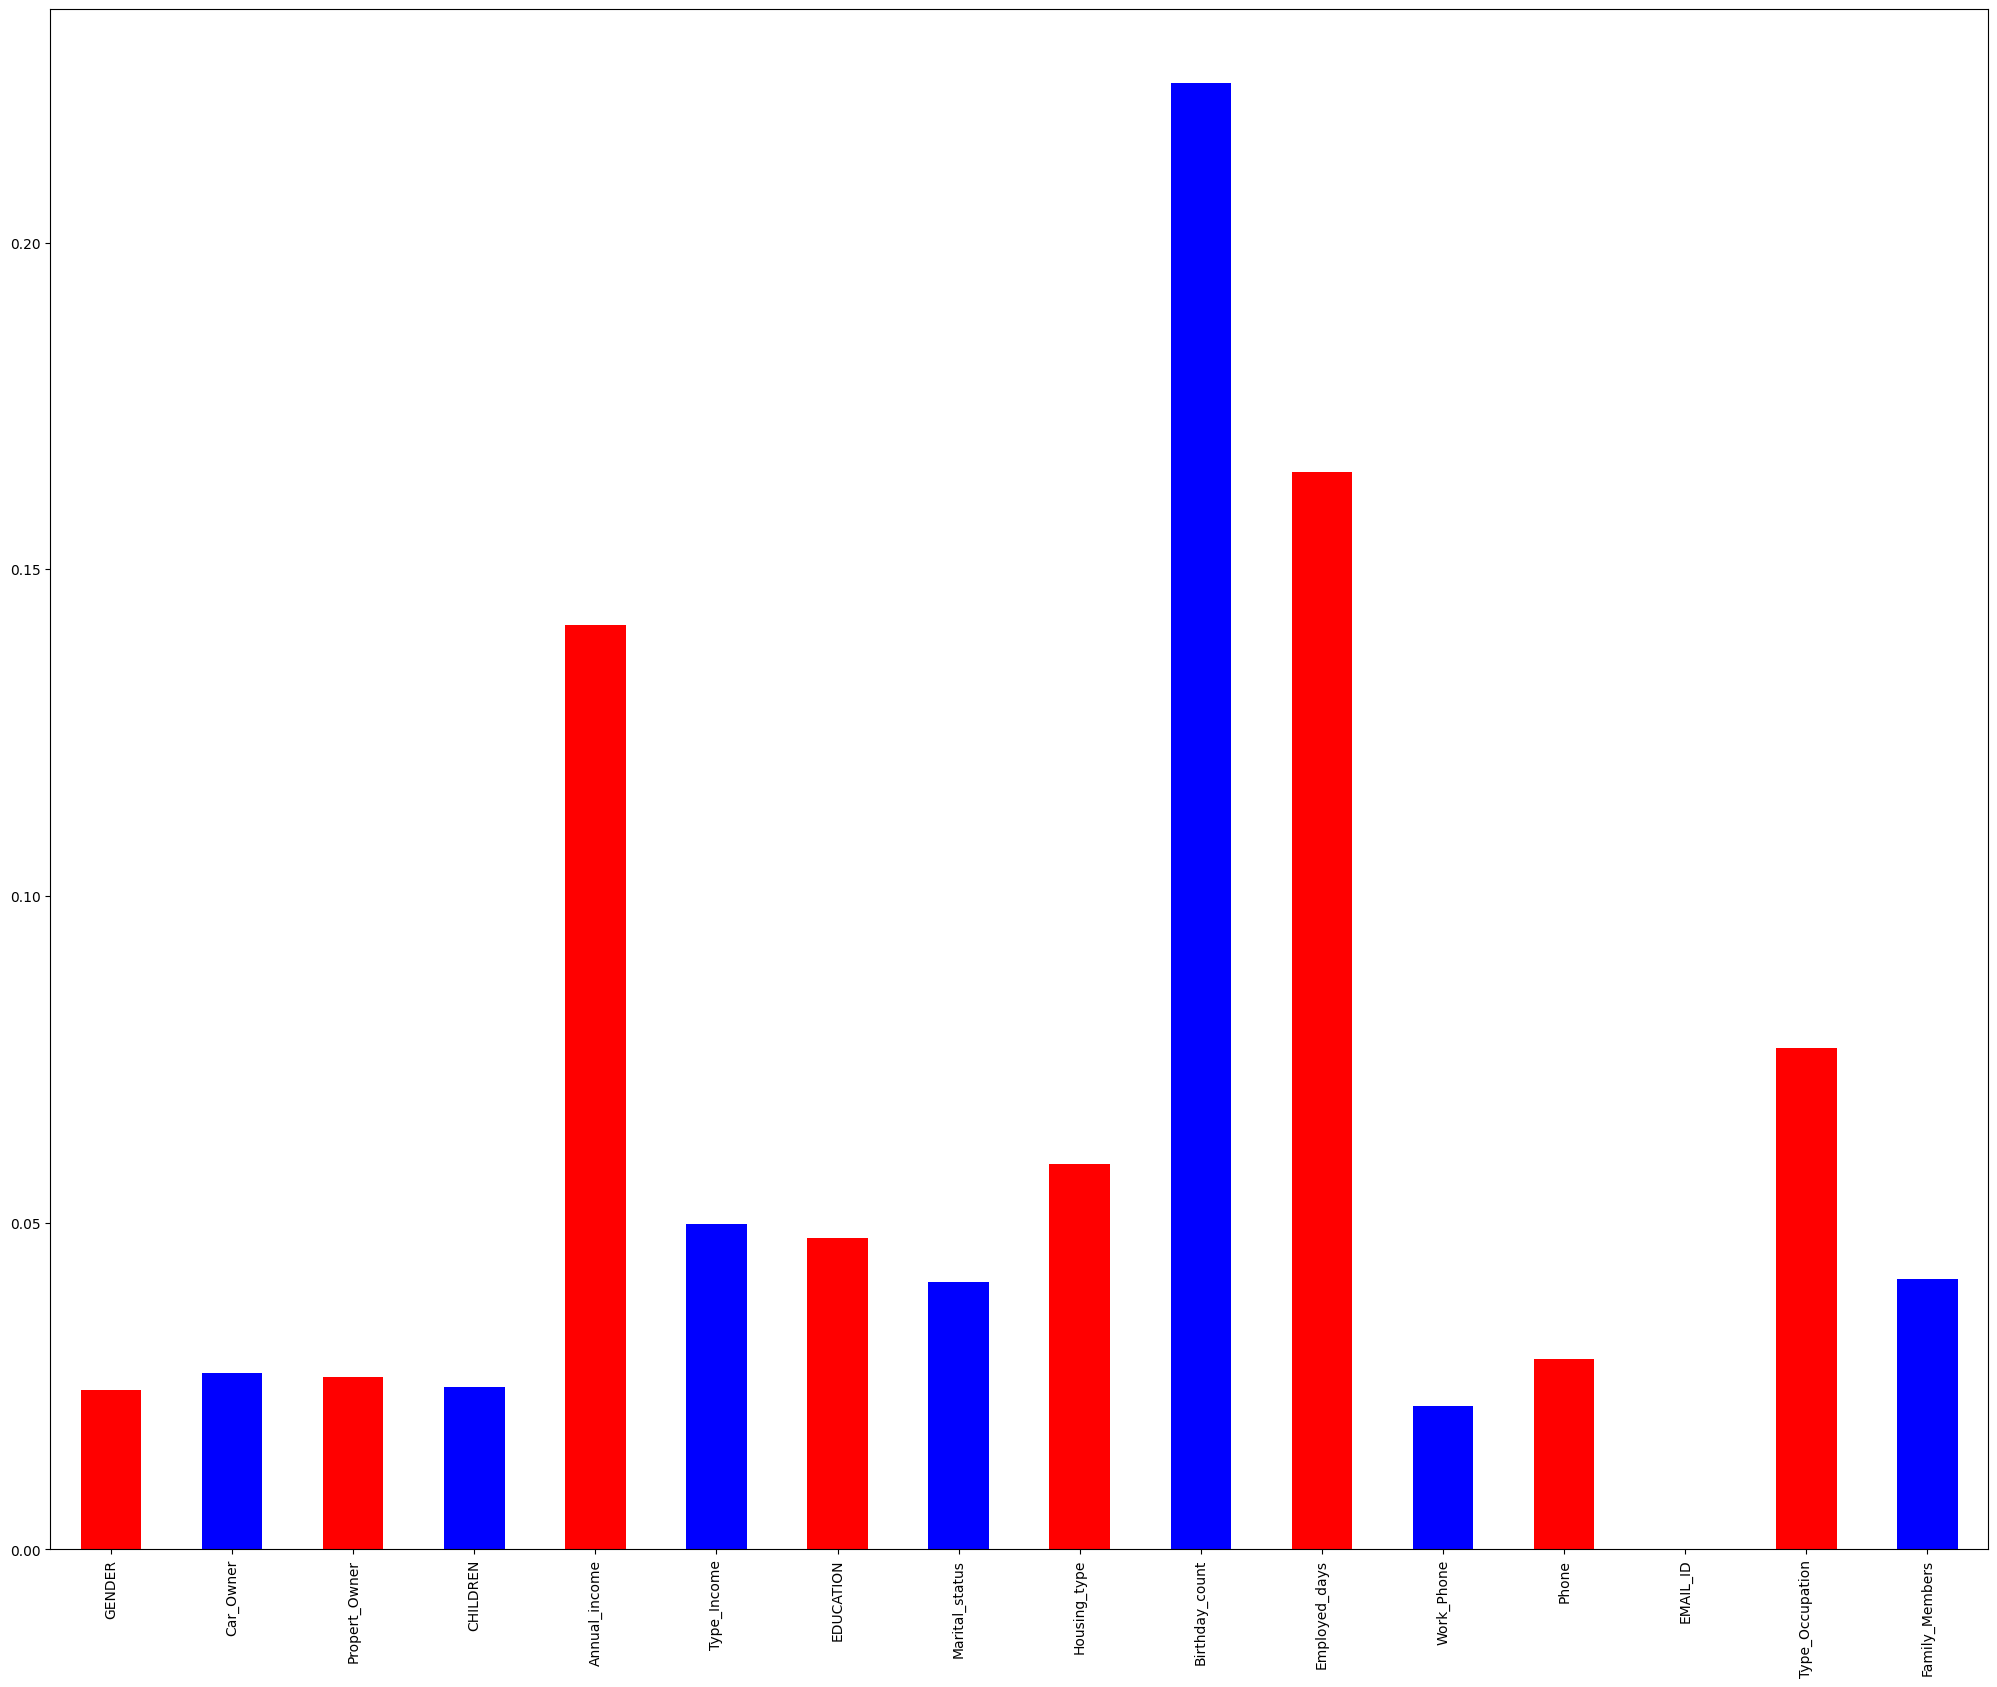

In [77]:
plt.figure(figsize=(25,20))
pd.Series(RF_1.feature_importances_, index=x_train.columns).plot(kind='bar', color=['red', 'blue'])

# Ensembling

In [78]:
from sklearn.ensemble import VotingClassifier

eclf_1 = VotingClassifier(estimators=[('rf', RF_1), ('knn', knn_1),
                                    ('logreg', logreg_1), ('SVM', SVM_1)],
                        voting='hard', weights=[1, 1, 1, 1])

eclf_1.fit(x_train, y_train)
print(eclf_1.score(x_test, y_test))

0.9098837209302325


# After removing features with low importance

In [80]:
x_train = x_train.drop(['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Work_Phone','Phone','EMAIL_ID'], axis=1)
x_test = x_test.drop(['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Work_Phone','Phone','EMAIL_ID'], axis=1)

# Logistic Regression

In [81]:
logreg_2 = LogisticRegression()

total_acc = []

for train_index , val_index in kf.split(x_train):
    X_train , X_val = x_train.iloc[train_index,:],x_train.iloc[val_index,:]
    Y_train , Y_val = y_train.iloc[train_index] , y_train.iloc[val_index]
    
    logreg_2.fit(X_train, Y_train)
    Y_pred = logreg_2.predict(X_val)
    
    acc = accuracy_score(Y_pred , Y_val)
    total_acc.append(acc)
    
avg_acc = sum(total_acc)/5

print(avg_acc)

y_pred = logreg_2.predict(x_test)
print(f"{accuracy_score(y_pred , y_test)}")

0.8814586786644565
0.9011627906976745


# KNN

In [82]:
from sklearn.model_selection import GridSearchCV
from time import perf_counter

params = dict()
params['n_neighbors'] = list(range(1, 20))
params['weights'] = ['uniform', 'distance']
params['metric'] = ['euclidean', 'manhattan', 'minkowski']

gs = GridSearchCV(KNeighborsClassifier(), param_grid=params, n_jobs= -1)

start_time = perf_counter()
gs.fit(x_train, y_train)
end_time = perf_counter()

# summarize result
print("Best Score:", gs.best_score_)
print("Best Hyperparameters:", gs.best_params_)
print("Grid Search Time is: %f seconds" % (end_time-start_time))

Best Score: 0.9154534690977979
Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 16, 'weights': 'distance'}
Grid Search Time is: 8.708855 seconds


In [83]:
knn_2 = KNeighborsClassifier(n_neighbors=17, metric='manhattan', weights='distance')
total_acc = []

for train_index , val_index in kf.split(x_train):
    X_train , X_val = x_train.iloc[train_index,:],x_train.iloc[val_index,:]
    Y_train , Y_val = y_train.iloc[train_index] , y_train.iloc[val_index]
    
    knn_2.fit(X_train, Y_train)
    Y_pred = knn_2.predict(X_val)
    
    acc = accuracy_score(Y_pred , Y_val)
    total_acc.append(acc)
    
avg_acc = sum(total_acc)/5

print(avg_acc)

y_pred = knn_2.predict(x_test)
print(f"{accuracy_score(y_pred , y_test)}")

0.916438550793275
0.9273255813953488


# SVM

In [84]:
SVM_2 = SVC(kernel='rbf')
SVM_2.fit(x_train, y_train)

y_pred = SVM_2.predict(x_test)
print(f"{accuracy_score(y_pred , y_test)}")

0.9098837209302325




# Random forest


In [86]:
params = dict()
params['n_estimators'] = list(range(1, 10))
params['max_features'] = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]
params['max_depth'] = list(range(1, 10))
params['min_samples_split'] = list(range(10, 20))

gs = GridSearchCV(RandomForestClassifierScikit(), param_grid=params, n_jobs=-1)
start_time = perf_counter()
gs.fit(x_train, y_train)
end_time = perf_counter()

print("Best Score:", gs.best_score_)
print("Best Hyperparameters:", gs.best_params_)
print("Grid Search Time is: %f seconds" % (end_time-start_time))

Best Score: 0.8950272318257163
Best Hyperparameters: {'max_depth': 8, 'max_features': 0.9, 'min_samples_split': 11, 'n_estimators': 5}
Grid Search Time is: 533.435813 seconds


In [88]:
RF_2 = RandomForestClassifierScikit(max_depth= 7, max_features= 0.6, min_samples_split= 16, n_estimators= 6)
total_acc = []

for train_index , val_index in kf.split(x_train):
    X_train , X_val = x_train.iloc[train_index,:],x_train.iloc[val_index,:]
    Y_train , Y_val = y_train.iloc[train_index] , y_train.iloc[val_index]
    
    RF_2.fit(X_train, Y_train)
    Y_pred = RF_2.predict(X_val)
    
    acc = accuracy_score(Y_pred , Y_val)
    total_acc.append(acc)
    
avg_acc = sum(total_acc)/5

print(avg_acc)

print(RF_2.score(x_test,y_test))

0.8853469097797774
0.9040697674418605


# Ensembling

In [89]:
eclf_2 = VotingClassifier(estimators=[('rf', RF_2), ('knn', knn_2),
                                    ('logreg', logreg_2), ('SVM', SVM_2)],
                        voting='hard', weights=[1, 1, 1, 1])

eclf_2.fit(x_train, y_train)
print(eclf_2.score(x_test, y_test))

0.9098837209302325
